## Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.  

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
#https://pypi.org/project/pyabf/
import pyabf

all_files = ['PYR1.abf','PYR2.abf','PYR3.abf','PYR4.abf','PYR5_rebound.abf']

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file: %s"%abf)

    abf.setSweep(1) # sweeps start at 0

    print('Times info (%i points): %s'%(len(abf.sweepX),abf.sweepX)) # sweep times (seconds)
    print('Current info (%i points): %s'%(len(abf.sweepY),abf.sweepY)) # sweep data (ADC)



--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-23.4985 -25.0244  -4.5776 ... -10.0708 -15.2588 -10.0708]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc25pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-86.3647 -68.9697 -82.0923 ... -85.144  -81.7871 -75.9888]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc

--- Loaded file (PYR1.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


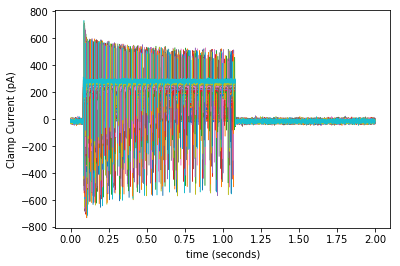

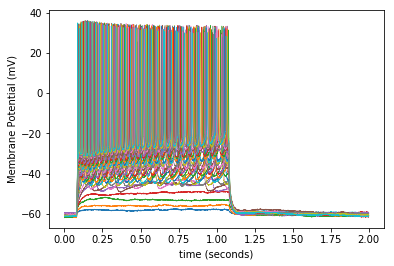

--- Loaded file (PYR2.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc25pA1s".


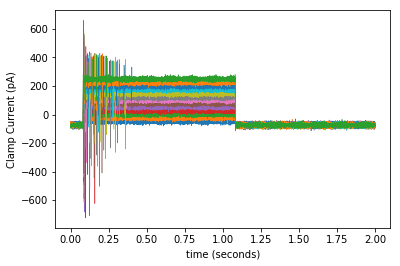

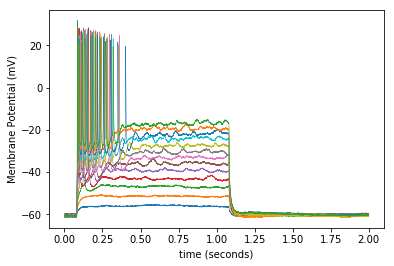

--- Loaded file (PYR3.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


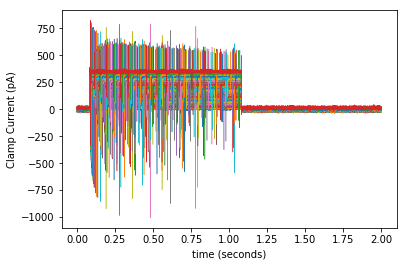

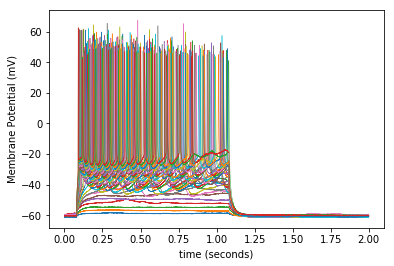

--- Loaded file (PYR4.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".


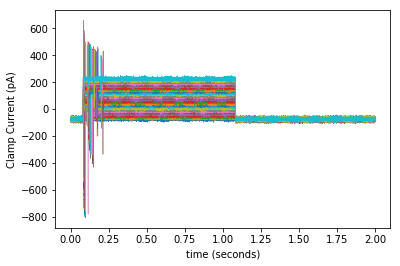

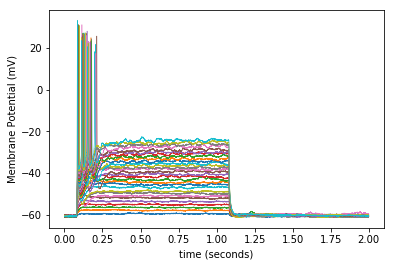

--- Loaded file (PYR5_rebound.abf): ABF (version 1.8.3.0) with 2 channels (nA, mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.37 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc-25pA1s".


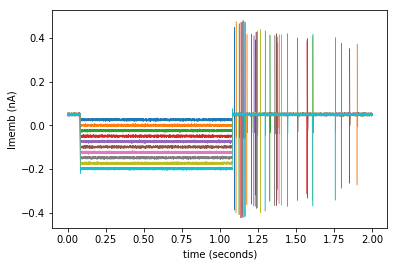

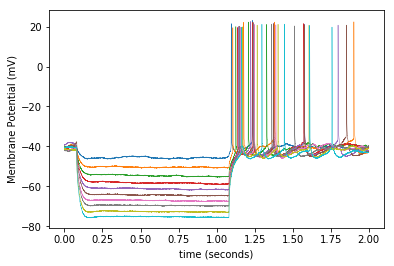

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file (%s): %s"%(f,abf))
    max = abf.sweepCount
    #max = 12

    for i in range(max):

        abf.setSweep(i, channel=0) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        #plt.legend()

    plt.show()

    for i in range(max):
        abf.setSweep(i, channel=1) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        #plt.legend()

    plt.show()


In [3]:
abf.setSweep(0)
print(abf)
print(abf.abfFileComment)
print(abf.abfVersion)
print(abf.adcNames)
print(abf.adcUnits)
print(abf.channelCount)
print(abf.channelList)
print(abf.data)
print(abf.dataPointsPerMs)
print(abf.protocol)
print(abf.protocolPath)
print(abf.stimulusByChannel)
print(abf.stimulusByChannel[1])
print(abf.sweepLabelX)
print(abf.sweepLabelY)
print(22)
print(abf.sweepLabelC)
print(abf.sweepChannel)
print(abf.sweepY)
abf.sweepChannel = 1
print(abf.sweepChannel)
print(abf.sweepY)
print(abf.sweepLabelY)

print(abf.sweepList)
print(abf._headerV1) # display header information in the console
print(abf.sweepX)
print(abf.sweepY)
print(abf.sweepC)
print(abf.sweepD())


ABF (version 1.8.3.0) with 2 channels (nA, mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.37 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc-25pA1s".

{'major': 1, 'minor': 8, 'bugfix': 3, 'build': 0}
['Imemb', 'Vm']
['nA', 'mV']
2
[0, 1]
[[  0.0497   0.0453   0.0455 ...   0.0473   0.0493   0.051 ]
 [-40.7104 -40.7104 -40.7715 ... -43.1824 -43.1824 -43.0603]]
10
C:\Axon\Params\Carey protocols\cc-25pA1s
C:\Axon\Params\Carey protocols\cc-25pA1s.pro
[Stimulus(abf, 0), Stimulus(abf, 1)]
Stimulus(abf, 1)
time (seconds)
Imemb (nA)
22
? (?)
0
[0.0497 0.0453 0.0455 ... 0.0482 0.0488 0.0499]
1
[0.0497 0.0453 0.0455 ... 0.0482 0.0488 0.0499]
Imemb (nA)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
[0.0497 0.0453 0.0455 ... 0.0482 0.0488 0.0499]
[-2.5 -2.5 -2.5 ... -2.5 -2.5 -2.5]
[0 0 0 ... 0 0 0]


In [4]:
from datetime import datetime

from dateutil.tz import tzlocal
import pynwb
print('Using pynwb v%s'%pynwb.__version__)
import math
import platform

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file: %s"%abf)
    reference = f.split('.')[0]

    start_time = datetime(2019, 1, 1, 11, tzinfo=tzlocal())
    create_date = datetime.now(tz=tzlocal())
    
    import hdmf._version
    hdmf_ver = 'v%s'%hdmf._version.get_versions()['version']
    
    notes = 'NWB2 file with ephys created with pynwb v%s (HDMF %s) and Python %s' %(pynwb.__version__,hdmf_ver,platform.python_version())

    nwbfile = pynwb.NWBFile('Ferguson et al. %s'%f, 
                      'Ferguson et al. %s'%f, 
                      start_time,
                      file_create_date=create_date,
                      notes=notes,
                      experimenter='Katie A. Ferguson',
                      experiment_description='Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing',
                      institution='University of Toronto')

    for i in range(max):
        abf.setSweep(i, channel=1) # sweeps start at 0
        timestamps = abf.sweepX
        data = abf.sweepY

        ts = pynwb.TimeSeries('Sweep_%i'%i, 
                              data, 
                              'mV', 
                              timestamps=timestamps, 
                              description='Sweep %i, membrane potential'%i,
                              comments='Extracted from ABF file: %s'%f)

        nwbfile.add_acquisition(ts)

        abf.setSweep(i, channel=0) # sweeps start at 0
        timestamps = abf.sweepX
        data = abf.sweepY
        in_current = i * (10.0 if reference in ['PYR1','PYR3','PYR4'] else 25.0)
        if reference == 'PYR5_rebound':
            in_current = 25.0 - i * (25.0)
        ts_stim = pynwb.TimeSeries('Sweep_%i'%i, 
                                   data, 
                                   'pA', 
                                   timestamps=timestamps, 
                                   description='Sweep %i, applied current (pulse ~%spA)'%(i,in_current),
                                   comments='Extracted from ABF file: %s'%f)

        nwbfile.add_stimulus(ts_stim)

    nwb_file_name = 'FergusonEtAl2015%s.nwb'%('' if 'PYR1' in f else '_%s'%reference)
    io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
    io.write(nwbfile)
    io.close()
    print("Written NWB file to %s"%nwb_file_name)

Using pynwb v1.2.1
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".
Written NWB file to FergusonEtAl2015.nwb
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc25pA1s".
Written NWB file to FergusonEtAl2015_PYR2.nwb
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "C:\Axon\Params\Carey protocols\cc10pA1s".
Written NWB file to FergusonEtAl2015_PYR3.nwb
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, record

In [ ]:
import sys
sys.path.append("../NWB")

import nwb_info

nwb_info.print_info('FergusonEtAl2015.nwb')